In [ ]:
import os
import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import glob
import hashlib
import sys
import struct
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('/content/drive/MyDrive/PfePhishing/3Detecting Phishing Websites Using Machine Learning/dataset.csv')

In [ ]:
dataset.head()

,securLayer,HEXinURL,IPinURL,hostLength,URLlength,pathLength,dashInHOST,dotInHOST,dotInPATH,slashInURL,DigitInHOST,NumOfCertainKeyword,numOfSpecialCharacters,AtInURL,underscoreInHOST,underscoreInPATH,PresenceOfWWW,portRedirect,numOfHexWithePersent,NumberOfForms,numGet,numpost,numberOfOuterSRCinScript,numberOfScript,NumberOfIframe,NumberOfApplet,NumberOfEmbed,NumberOfFrame,NumberOflink,NumberOfNonlink,NumberOfFsubmint,NumberOfInputEmail,NumberOfInputpassword,NumberOfFbutton,alexa,age,target label
0,1,0,0,18,30,4,0,2,0,4,0,0,0,0,0,0,1,0,0,21,1,20,40,61,0,0,0,0,396,4,19,0,1,34,-1,9.00,1
1,1,1,0,12,64,44,1,1,0,6,0,1,0,0,0,0,0,0,0,0,0,0,10,12,0,0,0,0,83,1,0,0,0,19,6033072,6.00,1
2,0,0,0,25,58,26,0,1,1,4,0,4,0,0,0,0,0,0,0,1,0,1,1,3,0,0,0,0,67,0,0,0,0,19,-1,2.00,1
3,0,0,0,16,42,19,0,1,0,4,0,0,0,0,0,0,0,0,0,1,0,1,4,4,0,0,0,0,0,0,1,0,1,10,-1,0.11,1
4,1,0,0,14,45,23,0,2,1,6,0,1,0,0,0,0,1,0,0,1,1,0,18,22,1,0,0,0,115,26,0,1,6,5,838451,22.00,1


In [ ]:
dataset.groupby('target label').count()

,securLayer,HEXinURL,IPinURL,hostLength,URLlength,pathLength,dashInHOST,dotInHOST,dotInPATH,slashInURL,DigitInHOST,NumOfCertainKeyword,numOfSpecialCharacters,AtInURL,underscoreInHOST,underscoreInPATH,PresenceOfWWW,portRedirect,numOfHexWithePersent,NumberOfForms,numGet,numpost,numberOfOuterSRCinScript,numberOfScript,NumberOfIframe,NumberOfApplet,NumberOfEmbed,NumberOfFrame,NumberOflink,NumberOfNonlink,NumberOfFsubmint,NumberOfInputEmail,NumberOfInputpassword,NumberOfFbutton,alexa,age
target label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566,2566
1,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550,3550


In [ ]:
# Sepratating & assigning features and target columns to X & y
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

y = dataset['target label']
X = dataset.drop('target label',axis=1)
X = X.fillna(0)


lb_make = LabelEncoder()
y = lb_make.fit_transform(y)
y


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((4892, 36), (1224, 36))

# This section is for Performance results

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Classifier: Decision Tree

In [ ]:
# Decision Tree model 
import time
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 10)
# fit the model 
tree.fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=10)
scores.mean()
print("--- %s seconds ----" %(time.time() - start_time ))

--- 0.3501725196838379 seconds ----


In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

Performance Evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = scores.mean()
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.949
Decision Tree: Accuracy on test Data: 0.961


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Classifier: Random Forest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
# instantiate the model
forest = RandomForestClassifier(max_depth=10)

# fit the model 
forest.fit(X_train, y_train)
scores = cross_val_score(forest, X_train, y_train, cv=10)
scores.mean()
print("--- %s seconds ----" %(time.time() - start_time ))

--- 5.527318239212036 seconds ----


In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

Performance Evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = scores.mean()
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.962
Random forest: Accuracy on test Data: 0.977


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# XGBoost Classifier 

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier
start_time = time.time()
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=10)
#fit the model
xgb.fit(X_train, y_train)
scores = cross_val_score(xgb, X_train, y_train, cv=10)
scores.mean()
print("--- %s seconds ----" %(time.time() - start_time ))

--- 12.900518894195557 seconds ----


In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

Performance evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = scores.mean()
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.972
XGBoost : Accuracy on test Data: 0.984


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# **Classifier: Artificial Neural Network**

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:

from sklearn.preprocessing import StandardScaler                   # for normalization of our data
from keras.wrappers.scikit_learn import KerasClassifier            #package allowing keras to work with python
from sklearn.model_selection import cross_val_score, GridSearchCV  #using Kfold and if needed, GridSearch object in analysis
from sklearn.utils import shuffle                                  # shuffling our own made dataset
from keras.models import Sequential                                # linear layer stacks model for keras
from keras.layers import Dense, Dropout     

In [ ]:
    epoch = 20
        
    classifier = Sequential()
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform', input_dim = 36))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))      
    #classifier.add(Dropout(p= 0.1))   
    classifier.add(Dense(units = 1, activation='sigmoid',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    start_time = time.time()
    history = classifier.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test), verbose=1)
    print("--- %s seconds ----" %(time.time() - start_time ))

Epoch 1/20
153/153 [==============================] - 1s 3ms/step - loss: 1.2391 - accuracy: 0.7641 - val_loss: 0.4059 - val_accuracy: 0.8309
Epoch 2/20
153/153 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8265 - val_loss: 0.4729 - val_accuracy: 0.7737
Epoch 3/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8332 - val_loss: 0.2681 - val_accuracy: 0.8644
Epoch 4/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8645 - val_loss: 0.3180 - val_accuracy: 0.8399
Epoch 5/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8716 - val_loss: 0.2838 - val_accuracy: 0.8922
Epoch 6/20
153/153 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8496 - val_loss: 0.2612 - val_accuracy: 0.8619
Epoch 7/20
153/153 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8481 - val_loss: 0.2656 - val_accuracy: 0.8652
Epoch 

39/39 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.9052
Test Accuracy: 90.523


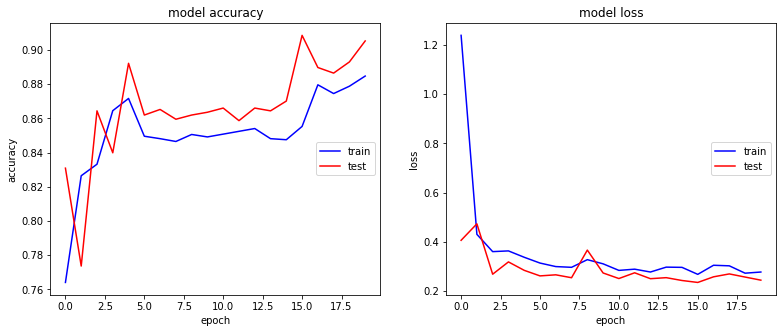

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def visualisation_history(history):
  
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13,5))

  ax1.plot(history.history['accuracy'],c='blue')
  ax1.plot(history.history['val_accuracy'],c='red')
  ax1.set_title('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'test'], loc='center right')
  

  ax2.plot(history.history['loss'],c='blue')
  ax2.plot(history.history['val_loss'],c='red')
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'test'], loc='center right')
  plt.show()
# evaluation du modèle
_, acc =classifier.evaluate(X_test, y_test)
print('Test Accuracy: %.3f' % (acc * 100))
visualisation_history(history)

Performance Evaluation

In [ ]:
scores = cross_val_score(
                        estimator=classifier, 
                        X = X_train,
                        y = y_train,
                        cv=10)
#scores.mean()

TypeError: ignored

In [ ]:
y_test_ann  = classifier.predict(X_test)
y_train_ann = classifier.predict(X_train)

In [ ]:
acc_train_ann = classifier.evaluate(X_train,y_train)[1]
acc_test_ann = classifier.evaluate(X_test,y_test)[1]

print('\nANN: Accuracy on training Data: {:.3f}' .format(acc_train_ann))
print('ANN: Accuracy on test Data: {:.3f}' .format(acc_test_ann))

39/39 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.9052

ANN: Accuracy on training Data: 0.891
ANN: Accuracy on test Data: 0.905


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('ANN', acc_train_ann, acc_test_ann)

# **Classifier: Convolutional Neural Network**


In [ ]:
from numpy import ndarray
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

AttributeError: ignored

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


epoch = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 35, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 35, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 35, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 34, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 34, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2176)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
epoch = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

#model.summary()

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test), verbose=1)
print("--- %s seconds ----" %(time.time() - start_time ))
# classifier = KerasClassifier(build_fn= CNN_builder,
#                              batch_size = 10,
#                              nb_epoch = 100)


Epoch 1/20
153/153 [==============================] - 2s 10ms/step - loss: 0.7376 - accuracy: 0.6684 - val_loss: 0.6455 - val_accuracy: 0.5335
Epoch 2/20
153/153 [==============================] - 1s 8ms/step - loss: 0.4576 - accuracy: 0.8277 - val_loss: 0.5493 - val_accuracy: 0.8480
Epoch 3/20
153/153 [==============================] - 1s 9ms/step - loss: 0.3665 - accuracy: 0.8704 - val_loss: 0.3751 - val_accuracy: 0.8799
Epoch 4/20
153/153 [==============================] - 1s 8ms/step - loss: 0.3207 - accuracy: 0.8812 - val_loss: 0.2473 - val_accuracy: 0.9126
Epoch 5/20
153/153 [==============================] - 1s 8ms/step - loss: 0.3018 - accuracy: 0.8925 - val_loss: 0.2050 - val_accuracy: 0.9232
Epoch 6/20
153/153 [==============================] - 1s 9ms/step - loss: 0.2893 - accuracy: 0.8937 - val_loss: 0.1917 - val_accuracy: 0.9322
Epoch 7/20
153/153 [==============================] - 1s 8ms/step - loss: 0.2764 - accuracy: 0.9019 - val_loss: 0.1854 - val_accuracy: 0.9363
Epoch

Performance evaluation

In [ ]:
acc_train_cnn = scores.mean()
acc_test_cnn = model.evaluate(X_test, y_test)[1]

print('\nCNN: Accuracy on training Data: {:.3f}' .format(acc_train_cnn))
print('CNN: Accuracy on test Data: {:.3f}' .format(acc_test_cnn))

39/39 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9469

CNN: Accuracy on training Data: 0.972
CNN: Accuracy on test Data: 0.947


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)

# Performance Comparison

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.949,0.961
1,Random Forest,0.962,0.977
2,XGBoost,0.972,0.984
3,ANN,0.891,0.905
4,CNN,0.972,0.947


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.972,0.984
1,Random Forest,0.962,0.977
0,Decision Tree,0.949,0.961
4,CNN,0.972,0.947
3,ANN,0.891,0.905


In [ ]:
# # Save model
# model.save("CNN-Antiphishing")